<a href="https://colab.research.google.com/github/MaximKiryakin/Household_Algorithm/blob/main/Hauseholder's_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Метод Хаусхолдера (отражений) для приведения симметричных матриц к трёхдиагональному виду




**Теорема 1 (Отражения Хаусхолдера)**: Если $\vec{x}$ и $\vec{y}$  - векторы с одинаковыми нормами, существует ортогональная симметричная матрица $P$, такая что 
$$Y = PX,$$ 
где 
$$P = I - 2ww'; \ \ \ w = \frac{X-Y}{\rVert X-Y \lVert_2}$$

Посколько $P$ ортогональная и симметричная, отсюда следует, что 
$$P^{-1} = P$$



**Следствие**

Пусть $A$ это матрица размера $n \ $x$\ n$, и $X$ - любой вектор. Тогда если $k \in [1, n-2]$, мы можем построить вектор $W_k$ и матрицу $P_k = I - 2W_kW'_k$, 
такую что $$P_kX = Y$$ 

Требуется определить $S$, такое что $\rVert X \rVert_2  = \rVert Y \rVert_2 $, а потом использовать Теорему 1. Должно быть выполнено: $$S^2 = x^2_{k+1} + ... + x^2_{n}$$

Это можно проверить, вычислив нормы: $$\rVert X \rVert_2 = x^2_{1} + ... + x^2_{n} = x^2_{1} + ... + x^2_{k} + S^2  = \rVert Y \rVert_2$$

$$w = \frac{1}{r}(X - Y)  = \frac{1}{r}[0 ... 0 (x^2_{k+1} + S), x^2_{k+2} ... x^2_{n}] $$

Меньшая ошибка вычисления достигается, когда знак $S$ выбирается такой же как и знак $x^2_{k+1}$

$$S = sign(x_{k+1})(x^2_{k+1} + ... + x^2_{n})^{0.5}$$

Число $R$ выбирается такое, что $\rVert W \rVert_2 = 1$, тогда

$$R = (x_{k+1} + S)^2 + x^2_{k+2} + ... + x^2_{n}= 2x^2_{k+1}S + 2S^2 $$


**Теорема 2** Если $P$ это матрица Хаусхолдера, тогда преобразование $PAP$ выполнятся следующим образом:
$$v = Aw$$
$$c = w'v$$
$$q =v- cw$$
$$PAP = A - 2wq' -2qw'$$

**Реализация**

In [ ]:
import numpy as np
import pandas as pd
from tqdm import tqdm

In [ ]:
N = 9

In [ ]:
%%time
a = np.eye(N)
for i in range(N):
  for j in range(0, i+1):
    a[i, j]  = a[j, i] = np.random.randint(1, 7)

CPU times: user 428 µs, sys: 0 ns, total: 428 µs
Wall time: 437 µs


In [ ]:
a

array([[2., 6., 2., 1., 2., 3., 5., 2., 5.],
       [6., 6., 2., 3., 5., 1., 1., 3., 4.],
       [2., 2., 3., 2., 2., 3., 3., 1., 5.],
       [1., 3., 2., 4., 3., 1., 5., 4., 2.],
       [2., 5., 2., 3., 6., 2., 3., 3., 5.],
       [3., 1., 3., 1., 2., 3., 6., 6., 1.],
       [5., 1., 3., 5., 3., 6., 3., 5., 1.],
       [2., 3., 1., 4., 3., 6., 5., 6., 1.],
       [5., 4., 5., 2., 5., 1., 1., 1., 4.]])

In [ ]:
# скрипт с использованием библиотеки numpy
for i in tqdm(range(N - 2)):
  s = np.sign(a[i+1, i])*np.linalg.norm(a[i + 1:, i])
  r = np.sqrt(2 * a[i + 1, i] * s + 2 * s**2)
  w = np.zeros(N)
  w[i+1] = a[i+1, i] + s
  for j in range(i+2, N, 1):
    w[j] = a[j, i]
  w *= 1/r
  V = np.dot(a, w)
  c = np.dot(w, V)
  q = V - c*w
  a = a - 2*np.outer(w, q) - 2*np.outer(q, w)

a = np.round(a, 1)

100%|██████████| 7/7 [00:00<00:00, 3186.47it/s]


In [ ]:
a

array([[  2. , -10.4,  -0. ,  -0. ,  -0. ,   0. ,  -0. ,   0. ,   0. ],
       [-10.4,  19.3,  11.2,  -0. ,   0. ,  -0. ,   0. ,   0. ,  -0. ],
       [ -0. ,  11.2,   4.5,   3.8,  -0. ,  -0. ,   0. ,   0. ,   0. ],
       [ -0. ,  -0. ,   3.8,   5.1,  -4.9,  -0. ,  -0. ,  -0. ,  -0. ],
       [ -0. ,   0. ,  -0. ,  -4.9,   3.2,   2.8,   0. ,  -0. ,   0. ],
       [  0. ,  -0. ,   0. ,  -0. ,   2.8,  -0.9,  -2.7,   0. ,  -0. ],
       [ -0. ,   0. ,   0. ,  -0. ,   0. ,  -2.7,   1.3,  -2.3,  -0. ],
       [  0. ,   0. ,   0. ,  -0. ,  -0. ,   0. ,  -2.3,   0.7,   1.3],
       [  0. ,   0. ,   0. ,  -0. ,   0. ,  -0. ,   0. ,   1.3,   1.8]])

In [ ]:
# Создание матрицы без использования numpy;
a = [[0] * N for _ in range(N)]
for i in range(N):
  for j in range(0, i+1):
    a[i][j]  = a[j][i] = np.random.randint(1, 7)

In [ ]:
a

[[6, 5, 5, 1, 4, 3, 5, 1, 4],
 [5, 2, 6, 2, 2, 5, 2, 2, 5],
 [5, 6, 3, 4, 1, 5, 5, 6, 5],
 [1, 2, 4, 4, 4, 5, 3, 2, 1],
 [4, 2, 1, 4, 3, 3, 6, 1, 5],
 [3, 5, 5, 5, 3, 1, 2, 3, 2],
 [5, 2, 5, 3, 6, 2, 2, 2, 6],
 [1, 2, 6, 2, 1, 3, 2, 3, 6],
 [4, 5, 5, 1, 5, 2, 6, 6, 2]]

In [ ]:
np.savetxt('matrix.txt', a, delimiter = '', fmt='%10.2f')  

In [ ]:
# Функцмя внешнего умножения векторов
def vector_vector_multiplication(a, b):
    size = len(a)
    matrix = [[0] * size for _ in range(size)]
    if len(a) != len(b) or len(a) != len(matrix):
        return 0
    for i in range(size):
      for j in range(size):
         matrix[i][j] = a[i] * b[j]
    return matrix


In [ ]:
# функция умножения матрицы на число
def matrix_digit_multiply(a, digit):
  size = len(a)
  for i in range(size):
    for j in range(size):
       a[i][j] = a[i][j] * digit;
  return a


In [ ]:
# фунция вычитания матриц
def matrix_subtraction( a, b):
  size = len(a)
  c = [[0]* size for _ in range(size)]
  for i in range(size):
    for j in range(size):
      c[i][j] = a[i][j] - b[i][j]
  return c

In [ ]:
# Функция скалярного умножения векторов
def dot(a, b):
    ans = 0
    size = len(a)
    if len(a) != len(b):
        return 0
    for i in range(size):
        ans += a[i] * b[i]
    return ans


In [ ]:
def sign(x):
  return 1 if x > 0 else -1 if x < 0 else 0

In [ ]:
# Функция умножения матрицы на вектор
def dot_matrix_vector(matrix, b):
    size = len(matrix)
    ans = [0]*size
    if len(matrix) != len(b):
        return 0

    for k in range(size):
        ans[k] = 0
        for i in range(size):
            ans[k] += matrix[k][i] * b[i];
    return ans

In [ ]:
# скрипт без использования numpy
def matrix_transformation(matrix):
  size = len(matrix);
  for i in range(size - 2):
    norm = 0
    for j  in range(i+1, size, 1):
      norm += matrix[j][i] * matrix[j][i]
    norm = norm**0.5

    s = sign(matrix[i + 1][i]) * norm
    r = (2 * matrix[i + 1][i] * s + 2 * s * s)**0.5

    w = [0]*size

    w[i + 1] = (matrix[i + 1][i] + s) * (1 / r)

    for j in range(i+ 2, size, 1):
      w[j] = matrix[j][i] * (1 / r)

    v =  dot_matrix_vector(matrix, w)



    c = dot(v, w)


    q = [0] * size
    for j in range(size):
      q[j] = v[j] - c * w[j]

    tmp1 = vector_vector_multiplication(w, q)
    tmp2 = vector_vector_multiplication(q, w)
    tmp1 = matrix_digit_multiply(tmp1, 2)
    tmp2 = matrix_digit_multiply(tmp2, 2)
    matrix = matrix_subtraction(matrix, tmp1)
    matrix = matrix_subtraction(matrix, tmp2)
  return matrix


In [ ]:
np.savetxt('matrix_transform.txt', a, delimiter = '', fmt='%10.2f')  

In [ ]:
a

[[6, 5, 5, 1, 4, 3, 5, 1, 4],
 [5, 2, 6, 2, 2, 5, 2, 2, 5],
 [5, 6, 3, 4, 1, 5, 5, 6, 5],
 [1, 2, 4, 4, 4, 5, 3, 2, 1],
 [4, 2, 1, 4, 3, 3, 6, 1, 5],
 [3, 5, 5, 5, 3, 1, 2, 3, 2],
 [5, 2, 5, 3, 6, 2, 2, 2, 6],
 [1, 2, 6, 2, 1, 3, 2, 3, 6],
 [4, 5, 5, 1, 5, 2, 6, 6, 2]]

In [ ]:
a = matrix_transformation(a)

size = len(a)
for i in range(size):
  for j in range(size):
    a[i][j] = round(a[i][j], 2)
print(np.array(a))

[[  6.   -10.86   0.     0.     0.     0.    -0.    -0.     0.  ]
 [-10.86  24.57   9.31  -0.    -0.     0.    -0.    -0.    -0.  ]
 [  0.     9.31   3.91  -2.55  -0.     0.     0.     0.    -0.  ]
 [  0.    -0.    -2.55  -0.79   4.29  -0.     0.    -0.    -0.  ]
 [  0.    -0.    -0.     4.29   0.1    2.67   0.     0.    -0.  ]
 [  0.     0.     0.    -0.     2.67  -2.05   2.63  -0.     0.  ]
 [ -0.    -0.     0.    -0.    -0.     2.63   0.87  -4.57  -0.  ]
 [ -0.    -0.    -0.     0.     0.    -0.    -4.57  -1.6   -2.1 ]
 [  0.    -0.    -0.    -0.    -0.     0.     0.    -2.1   -5.01]]


In [ ]:
import matplotlib.pyplot as plt

In [47]:
y = [2, 20, 161, 1312, 11056]
x = [256, 512, 1024, 2048, 4096]


In [48]:
import scipy.interpolate

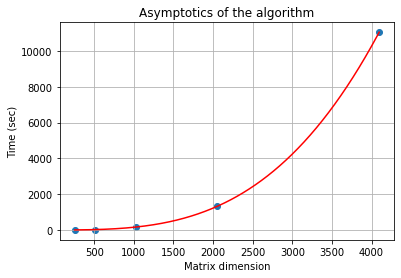

In [50]:
f = scipy.interpolate.interp1d(x, y, 'cubic')
net = np.linspace(256, 4096, 500)
plt.plot(net, f(net), c = 'r')
plt.title("Asymptotics of the algorithm")
plt.xlabel("Matrix dimension")
plt.ylabel("Time (sec)")
plt.grid()
plt.scatter(x,y)

plt.show()